#### 경계선 분리

otsu threshold: 140.0


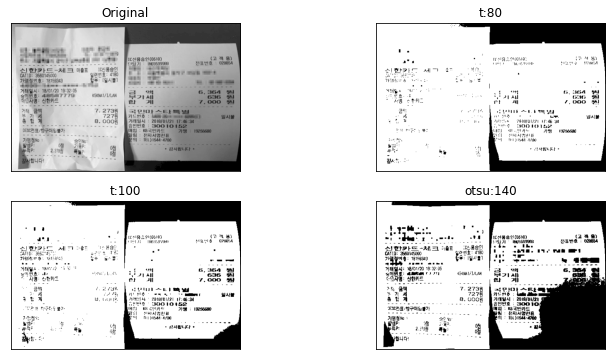

In [6]:
import cv2
import matplotlib.pylab as plt   

plt.rcParams['figure.figsize'] = (12,6)
# 이미지를 그레이 스케일로 읽기
img = cv2.imread('OPENCV/receipt.png', cv2.IMREAD_GRAYSCALE)
# 경계 값을 80, 100 으로 임의 지정
_, t_80	= cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
_, t_100 = cv2.threshold(img, 100,255, cv2.THRESH_BINARY) 
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택


#경계값 -1(의미없는 값)의 전달은 자동으로 경곗값을 선택
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  

# Otsu 알고리즘으로 선택된 경계
print('otsu threshold:', t)

imgs = {'Original': img,'t:80':t_80,'t:100':t_100, 'otsu:%d'%t: t_otsu}  
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)  
    plt.title(key)  
    plt.imshow(value, cmap='gray')  
    plt.xticks([]); plt.yticks([])
plt.show()


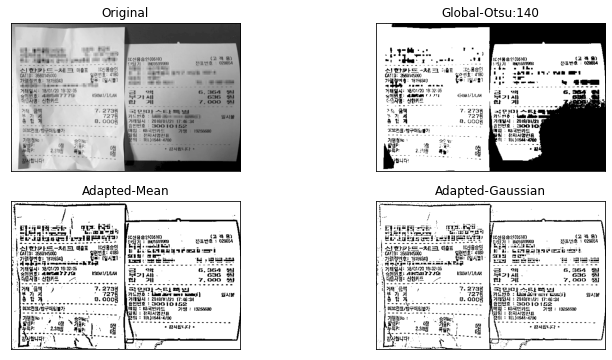

In [5]:
import cv2
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

blk_size = 9  # 블럭 사이즈
C = 5  # 차감 상수

# 그레이 스케일로 읽기
img = cv2.imread('OPENCV/receipt.png', cv2.IMREAD_GRAYSCALE)

#오츠의 알고리즘으로 단일 경계 값을 전체이미지에 적용
ret, th1 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#적응형 스레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(
    img,  # 입력 영상
    255,  # 경곗값을 만족하는 픽셀에 적용할 값
    cv2.ADAPTIVE_THRESH_MEAN_C,  # 스레시홀드 적용 방법 지정(이웃 픽셀의 평균으로 결정)
    cv2.THRESH_BINARY,  # 이진 분류
    blk_size, C)  # 영역으로 나눌 이웃의 크기, 계산된 경계 값 결과에서 가감할 상수

th3 = cv2.adaptiveThreshold(
    img,  # 입력 영상
    255,  # 경곗값을 만족하는 픽셀에 적용할 값
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 가우시안 분포에 따른 가중치의 합으로 결정
    cv2.THRESH_BINARY,  # 이진 분류
    blk_size,  #  영역으로 나눌 이웃의 크기, 계산된 경계 값 결과에서 가감할 상수
    C)

imgs = {
    'Original': img,
    'Global-Otsu:%d' % ret: th1,
    'Adapted-Mean': th2,
    'Adapted-Gaussian': th3
}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

#### 영상 합성

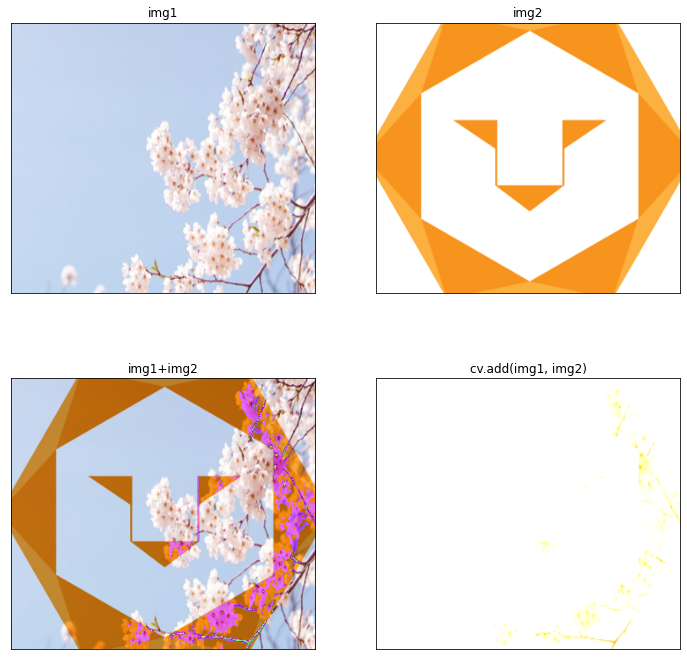

In [10]:
import cv2
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12,12)

# 연산에 사용할 이미지 읽기
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')

# 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2)  # OpenCV 함수
imgs = {
    'img1': img1,
    'img2': img2,
    'img1+img2': img3,
    'cv.add(img1, img2)': img4
}

# 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
import cv2

alpha = 0.5  # 합성에 사용할 알파 값
# 합성에 사용할 이미지 읽기
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')

# 함수를 활용한 방법
dst = cv2.addWeighted(
    img1,  # 합성할 첫 번째 이미지
    alpha,  # ima1에 지정할 가중치(알파값)
    img2,  # 합성할 두 번쨰 이미지
    (1 - alpha),  # img2에 지정할 가중치
    0)  # 연산 결과에 가감할 상수, 대체로 0적용
cv2.imshow('cv2.addWeighted', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 트랙바 만들기

In [ ]:
def onChange(value):
    v = cv2.getTrackbarPos(
        'trackbar',  # 찾고자 하는 트랙바 이름
        'win_name')  # 트랙바가 있는 창의 이름
    cv2.createTrackbar(
        'trackbar',  # 트랙바 이름
        'win_name',  # 트랙바를 표시할 창 이름0,	# 트랙 바 초기 값
        100,  # 트랙 바 최대 값
        onChange)  # 트랙바 이벤트 핸들러 함수
    

In [12]:
import cv2

win_name = 'Alpha blending'  # 창 이름
trackbar_name = 'fade'


# --- 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x / 100
    dst = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)


# 합성 영상 읽기
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')
# 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)
cv2.waitKey()
cv2.destroyAllWindows()

#### 차 영상(𝑖𝑚𝑎𝑔𝑒 𝑑𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑖𝑛𝑔) -  두 영상의 차이

    이러한 기법은 산업현장  에서 도면의 차이를 찾거나 전자제품의 PCB회로의 오류를 찾는 데도 사용할 수 있고, 
    카메라로 촬영한 영상에 실시간으로 움직임이 있는지를 알아내는 데도 유용합니다. 
    차 영상을 구할 때 두 영상을 무턱대고 빼기 연산을 하면 음수가 나올 수 있으므로 절대값을 구해야 합니다.

In [20]:
import cv2
# 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('OPENCV/floor_plan_A.jpg')
img2 = cv2.imread('OPENCV/floor_plan_B.jpg')

#그레이 스케일로 변환
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 1번. 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)
# 차 영상을 극대화 하기 위해 스레시홀드 처리 및 컬러로 변환
# 차이를 극대화 하기위해 1보다 큰 값은 모두 255로 바꿈
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)

# 2번. 색상을 표현하기 위해 컬러 스케일로 전환
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
# 차이가 발생한 부분에 대하여 붉은 색으로 전환
diff_red[:, :, 2] = 0

# 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)
# 원본 이미지는 배경이 흰색이므로 255를 가지고 있고 차영상은
# 차이가 있는 빨간색 영역을 제외하고는 255이므로  # XOR 연산을 하면 서로 다른 영역인 도면의
# 그림과 빨간색으로 표시된 차영상 부분이 합성됩니다.
# (XOR은 서로 다를 때만 ‘참’)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

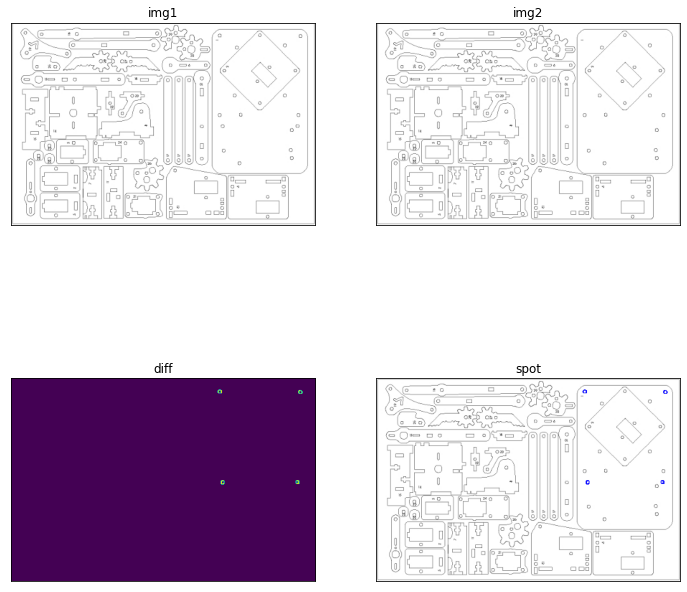

In [21]:
imgs = {
    'img1': img1,
    'img2': img2,
    'diff': diff,
    'spot': spot
}
# 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(v[:, :])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

#### 색상에 따라 영역 구분하기

    색을 가지고 마스크를 만들어야 하는데, HSV로 변환하면 원하는 색상 범위의 것만 골라낼 수 있습니다. 
        * dst = cv2.inRange(img, from, to) : 범위에 속하지 않은 픽셀 판단
            - img : 입력 영상
            - from : 범위의 시작 배열
            - to : 범위의 끝 배열
            - return img 가 from ~ to 에 포함되면 255, 아니면 0을 픽셀 값으로 하는 배열


In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt
# 신호등 영상 읽어서 HSV로 변환
img = cv2.imread("OPENCV/Traffic_light.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  #BGR을 HSV로 전환

# 색상별 영역 지정 np.array([H,S,V])
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255, 255])
green1 = np.array([45, 50, 50])
green2 = np.array([75, 255, 255])
red1 = np.array([0, 50, 50])
red2 = np.array([15, 255, 255])
red3 = np.array([165, 50, 50])
red4 = np.array([180, 255, 255])
yellow1 = np.array([20, 50, 50])
yellow2 = np.array([35, 255, 255])

# 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

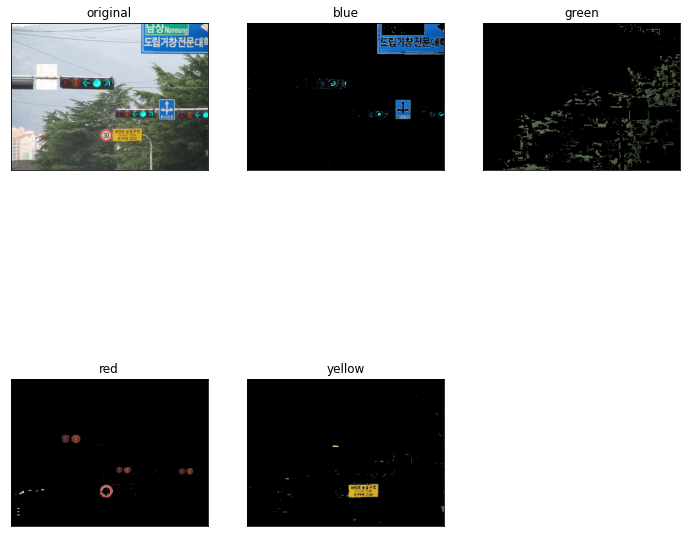

In [16]:
#색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

# 결과 출력
imgs = {
    'original': img,
    'blue': res_blue,
    'green': res_green,
    'red': res_red,
    'yellow': res_yellow
}



for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i + 1)
    plt.title(k)
    plt.imshow(v[:, :, ::-1])
    plt.xticks([])
    plt.yticks([])

plt.show()

#### 모션 CCTV

In [26]:
import cv2
import numpy as np

a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)  # 프레임 폭 480으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)  # 프레임의 높이를 320으로 설정

if cap.isOpened():
    ret, a = cap.read()  # a 프레임 읽기
    ret, b = cap.read()  # b 프레임 읽기
    while ret:
        ret, c = cap.read()  # c 프레임 읽기
        draw = c.copy()  # 출력 영상에 사용할 복제본
        if not ret:  # c프레임이 없으면 정지
            break
        # 3개의 영상을 그레이 스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c 절대값 차 구하기
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # 스레시홀드로 기준치 이내의 차이는 무시
        thresh = 25
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        # 두차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
        diff = cv2.bitwise_and(diff1_t, diff2_t)

        # 열림 연산으로 노이즈 제거
        # 미세한 노이즈 때문에 움직임 영역을 정확히 추출할 수 없어서 추가한 코드
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        # 차이가 발생한 픽셀의 갯수 판단후 사각형 그리기
        diff_cnt = cv2.countNonZero(diff)
        max_diff = 5  # 달라진 픽셀의 개수 기준치 설정

        if diff_cntt > max_diff:
            nzero = np.nonxero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])),
                          (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
            cv2.putText(draw, 'Motion Dtected', (10, 30),
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))

        # 컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor', stacked)

        # 다음 비교를 위해 영상 순서 정리
        a = b
        b = c
        if cv2.waitKey(1) & OxFF == 27:
            break

True